# PROSPER LOAN PYTHON PROJECT
## By Noel Ehimhen

## Introduction
- This is a dataset of Prosper Loan it's a comprehensive collection of information about loans and their associated borrowers. This dataset includes various features such as loan amounts, borrower credit ratings, employment status, and more, providing an excellent opportunity to analyze trends, relationships, and potential predictors of loan performance.


## Preliminary Wrangling

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('Prosper_Loan.csv')

In [44]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## Data Assessing
### Visually
- The columns names need to be standardized

- Unwanted colums need to be remove

### Programmatically

- Columns Information and data types

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [46]:
df.shape

(113937, 81)

### What is the structure of your dataset?
The dataset contains 113,937 rows and 81 columns. Each row represents a unique loan record, while the columns represent attributes such as Loan Status, Borrower APR, Borrower Rate, Debt To In come Ratio, Prosper Rating (Alpha), or Prosper Rating (numeric), Income Range, Employment Status, Loan Original Amount, Term, Credit Score Range Lower, Credit Score Range Upper.

### Data Wrangling
- Droping unwanted columns  

In [47]:
df = df.drop(columns=['CreditGrade', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanFirstDefaultedCycleNumber',
])

In [48]:
df.head(2)

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,36,Completed,14/08/2009 00:00,0.16516,0.158,0.138,NaN,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,36,Current,NaN,0.12016,0.092,0.082,0.0796,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


### Standardizing the columns with underscore ( _ )

In [49]:
df.columns = ['Listing_Key', 'Listing_Number', 'Listing_Creation_Date',
       'Term', 'Loan_Status', 'Closed_Date', 'Borrower_APR', 'Borrower_Rate',
       'Lender_Yield', 'Estimated_Effective_Yield', 'Estimated_Loss',
       'Estimated_Return', 'Prosper_Rating_(numeric)', 'Prosper_Rating_(Alpha)',
       'Prosper_Score', 'Listing_Category_(numeric)', 'Borrower_State',
       'Occupation', 'Employment_Status', 'Employment_Status_Duration',
       'Is_Borrower_Homeowner', 'Currently_In_Group', 'Group_Key',
       'Date_Credit_Pulled', 'Credit_Score_Range_Lower', 'Credit_Score_Range_Upper',
       'First_Recorded_Credit_Line', 'Current_Credit_Lines', 'Open_Credit_Lines',
       'Total_Credit_Linespast_7years', 'Open_Revolving_Accounts',
       'Open_Revolving_Monthly_Payment', 'Inquiries_Last_6Months', 'Total_Inquiries',
       'Current_Delinquencies', 'Amount_Delinquent', 'Delinquencies_Last_7Years',
       'Public_Records_Last10Years', 'Public_Records_Last12Months',
       'Revolving_Credit_Balance', 'Bankcard_Utilization',
       'Available_Bankcard_Credit', 'Total_Trades',
       'Trades_Never_Delinquent_(percentage)', 'Trades_Opened_Last6Months',
       'Debt_To_Income_Ratio', 'Income_Range', 'Income_Verifiable',
       'Stated_Monthly_Income', 'Loan_Key', 'Loan_Current_Days_Delinquent',
       'Loan_Months_Since_Origination', 'Loan_Number', 'Loan_Original_Amount',
       'Loan_Origination_Date', 'Loan_Origination_Quarter', 'Member_Key',
       'Monthly_Loan_Payment', 'LP_Customer_Payments',
       'LP_Customer_Principal_Payments', 'LP_Interestand_Fees', 'LP_Service_Fees',
       'LP_Collection_Fees', 'LP_Gross_Principal_Loss', 'LP_Net_Principal_Loss',
       'LP_Non_Principal_Recovery_payments', 'Percent_Funded', 'Recommendations',
       'Investment_From_Friends_Count', 'Investment_From_Friends_Amount',
       'Investors']

In [50]:
df.head(2)

,Listing_Key,Listing_Number,Listing_Creation_Date,Term,Loan_Status,Closed_Date,Borrower_APR,Borrower_Rate,Lender_Yield,Estimated_Effective_Yield,...,LP_Service_Fees,LP_Collection_Fees,LP_Gross_Principal_Loss,LP_Net_Principal_Loss,LP_Non_Principal_Recovery_payments,Percent_Funded,Recommendations,Investment_From_Friends_Count,Investment_From_Friends_Amount,Investors
0,1021339766868145413AB3B,193129,09:29.3,36,Completed,14/08/2009 00:00,0.16516,0.158,0.138,NaN,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,36,Current,NaN,0.12016,0.092,0.082,0.0796,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


### There are a few unusual points like 'Not displayed'  and 'Not employed' in the Income_Range column so I have to change it to Unknown for more clarity

In [51]:
df['Income_Range']

0         $25,000-49,999
1         $50,000-74,999
2          Not displayed
3         $25,000-49,999
4              $100,000+
               ...      
113932    $50,000-74,999
113933    $75,000-99,999
113934    $25,000-49,999
113935    $25,000-49,999
113936    $50,000-74,999
Name: Income_Range, Length: 113937, dtype: object

In [52]:
df['Income_Range'] = df['Income_Range'].replace(['Not displayed', 'Not employed'], 'Unknown')

### What is/are the main feature(s) of interest in your dataset?

- Loan Performance (This tells us whether the loan is current, completed, defaulted, or charged off).
- Borrower Metrics (These reflect the cost of borrowing and are influenced by credit risk, income, and other factors).
- Credit and Financial Risk Indicators (These variables directly impact lending decisions and borrower risk).
- Loan Amount and Terms (These provide insights into borrowing patterns and repayment Possibility).
- Income and Employment (These influence the borrower’s ability to repay loans).
- Loan Origination and Timing (These analyze trends over time).

### Features in the dataset do you that will help support the investigation into your feature(s) of interest
- Loan Status
- Borrower APR
- Borrower Rate
- Debt To In come Ratio
- Prosper Rating (Alpha) or Prosper Rating (numeric)
- Income Range
- Employment Status
- Loan Original Amount
- Term
- Credit Score Range Lower
- Credit Score Range Upper

# Univariate Exploration Framework
### What is the distribution of loan statuses?

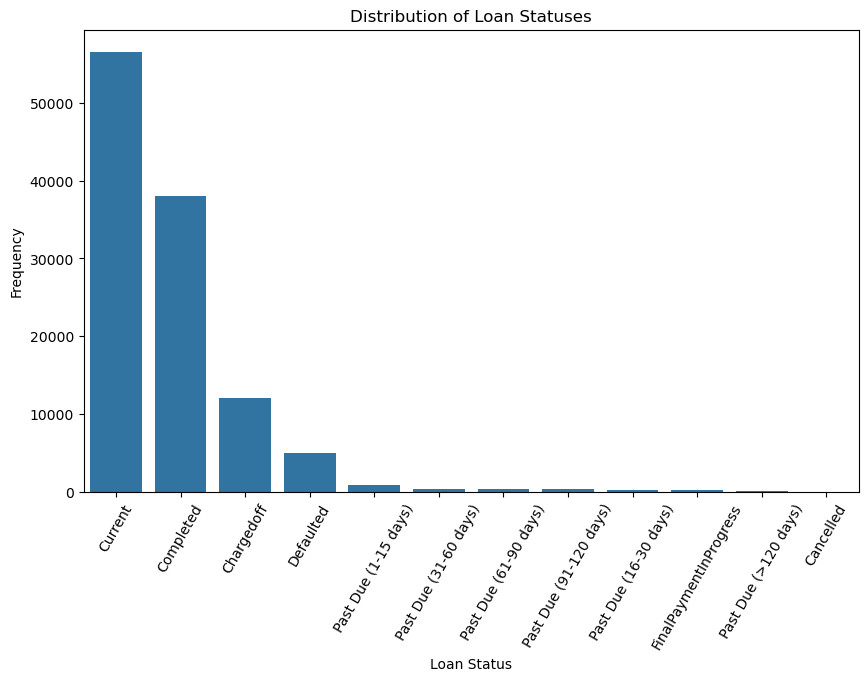

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Loan_Status', order=df['Loan_Status'].value_counts().index)
plt.xticks(rotation=60)
plt.title('Distribution of Loan Statuses')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.show()

### Observations 
- Current loans dominate the dataset, indicating a large proportion of loans are still active.
- Completed loans are the second most frequent, showing that many borrowers successfully repay their loans in full. 
- Charged Off and Defaulted loans are less frequent, whhile there was no cancelled loan at the moment 

### What is the distribution of Borrower APR (Annual Percentage Rate)

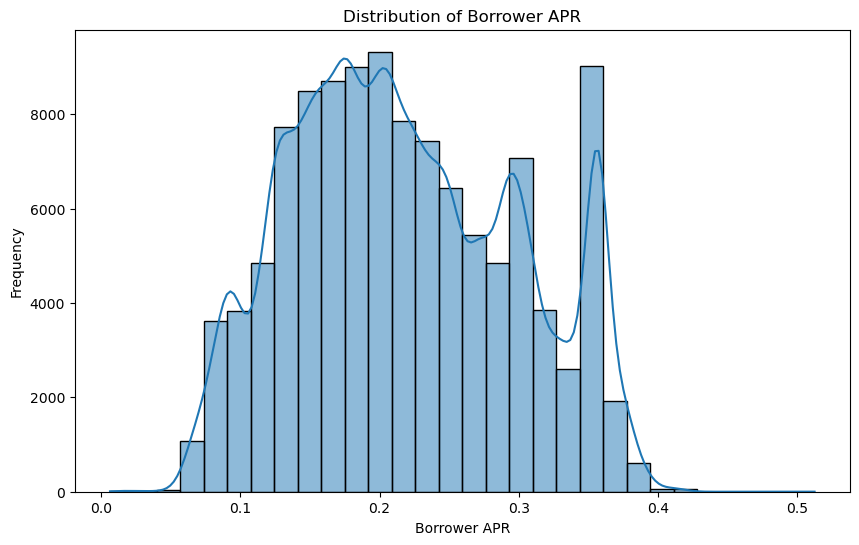

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Borrower_APR', kde=True, bins=30)
plt.title('Distribution of Borrower APR')
plt.xlabel('Borrower APR')
plt.ylabel('Frequency')
plt.show()

### Obervation 
- The Annual Percentage Rate values are not distributed normally, there are some loan with significantly higher rates which I think was ikely influenced by borrower credit scores or loan terms.

### What is the distribution of loan amounts?

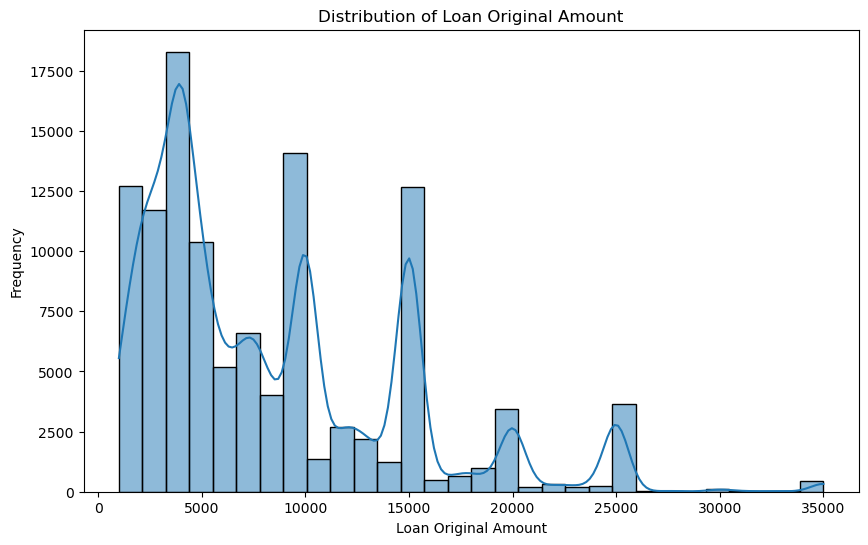

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Loan_Original_Amount', kde=True, bins=30)
plt.title('Distribution of Loan Original Amount')
plt.xlabel('Loan Original Amount')
plt.ylabel('Frequency')
plt.show()

### Obervation
- Smaller loans are more common in the dataset, Larger loans occur less frequently

### What is the income range distribution of borrowers?

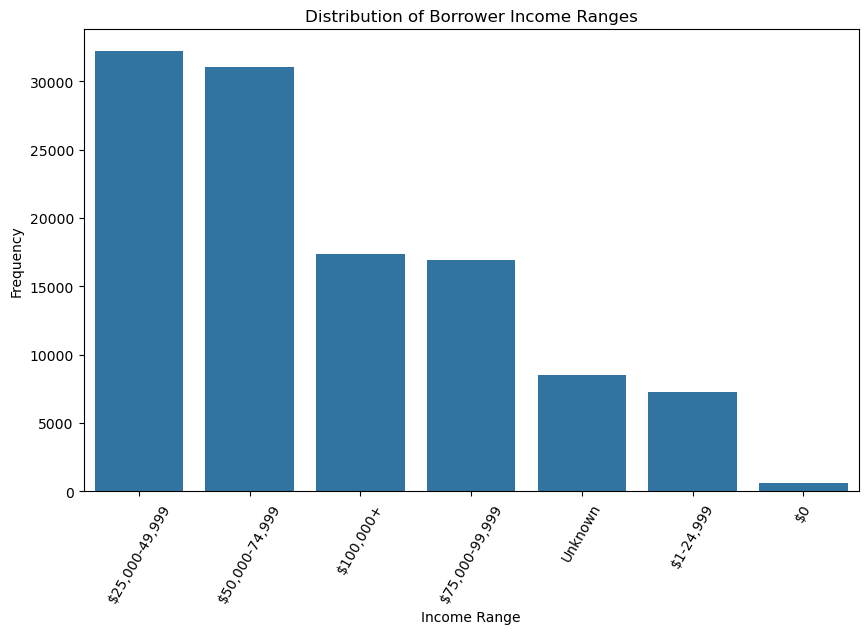

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Income_Range', order=df['Income_Range'].value_counts().index)
plt.xticks(rotation=60)
plt.title('Distribution of Borrower Income Ranges')
plt.xlabel('Income Range')
plt.ylabel('Frequency')
plt.show()

### Obervation 
- Low and average income ranges dominate the dataset, with the majority of loans being issued to borrowers within these income brackets

### What is the distribution of loan terms?

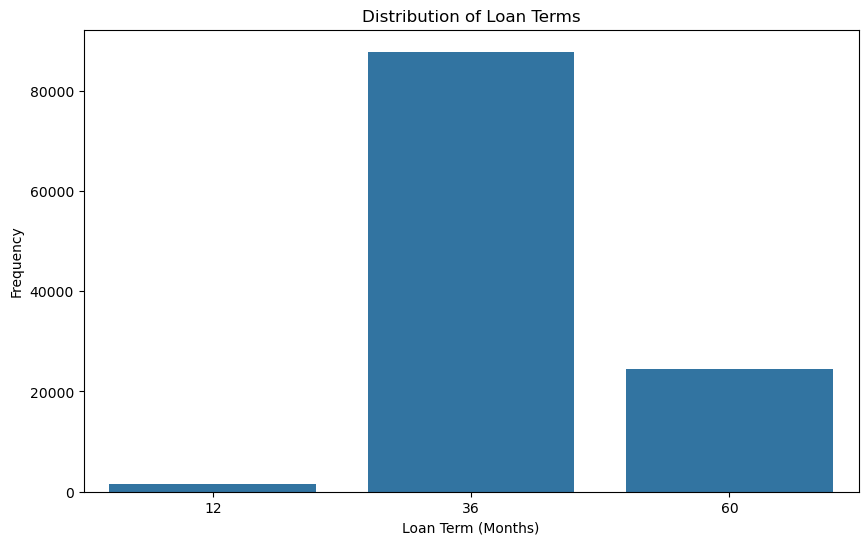

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Term')
plt.title('Distribution of Loan Terms')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Frequency')
plt.show()

### Observations
- 36 month loans are more common than 60 and 12 month loans. 

### How many are Homeowners 

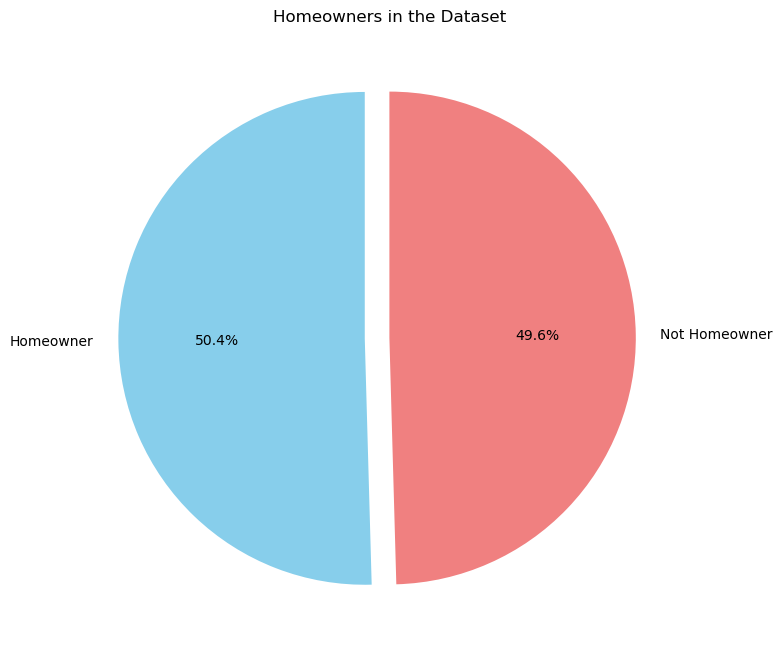

In [58]:
plt.figure(figsize=(10, 8))
df['Is_Borrower_Homeowner'].value_counts().plot(kind='pie', labels=['Homeowner', 'Not Homeowner'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'], explode=[0.1, 0])
plt.title('Homeowners in the Dataset')
plt.ylabel('')
plt.show()

### Observation 
- A significant portion of borrowers are not homeowners

### Distribution of Variables of Interest
- After examining the dataset, the primary variables of interest are Loan_Original_Amount, Income_Range, and Loan_Status.
- Most borrowers fall into mid-level income brackets, such as 25,000 - 49,999 and 50,000 - 74,999. Borrowers in higher income categories, such as $100,000+, are fewer in number.
- A notable portion of borrowers was not clear like "Not displayed" and "Not employed" under Income_Range. These categories were unclear, so they were  renamed to 'Unknown' for better clarity.
- There were no major transformations needed for the dataset overall. However, renaming the unclear categories improved the readability and interpretability of the data during analysis.

# Bivariate Exploration Framework

### Relationship Between Employment Status and Loan Status

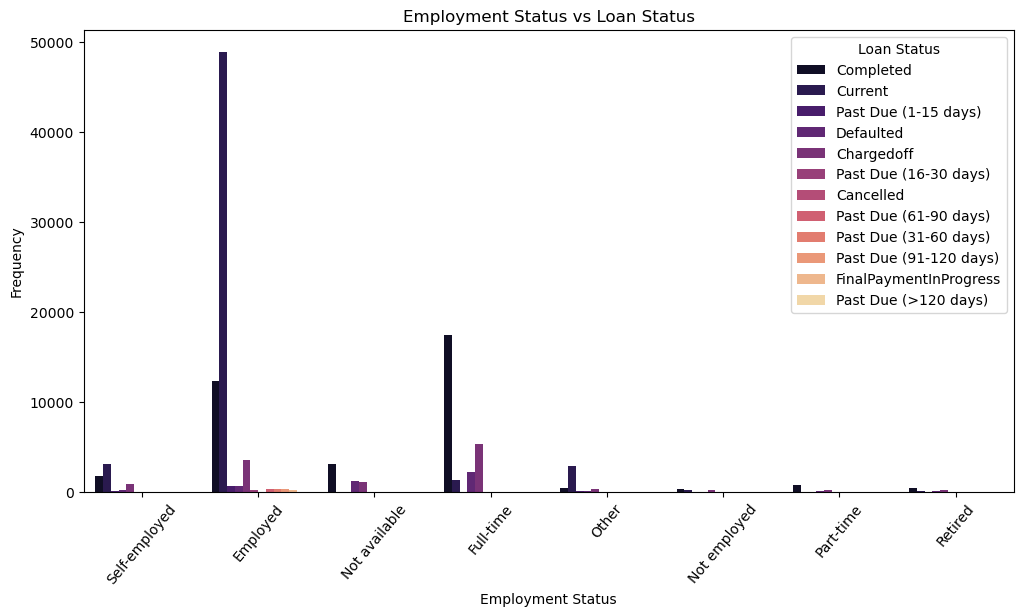

In [59]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Employment_Status', hue='Loan_Status', palette='magma')
plt.title('Employment Status vs Loan Status')
plt.xlabel('Employment Status')
plt.ylabel('Frequency')
plt.xticks(rotation=50)
plt.legend(title='Loan Status')
plt.show()

### Observation 
- Defaulted loans are more common among unemployed borrowers, whereas completed loans dominate among those who are employed full-time. Employment status is an important factor in loan repayment ability.

### Relationship Between Homeownership and Loan Status

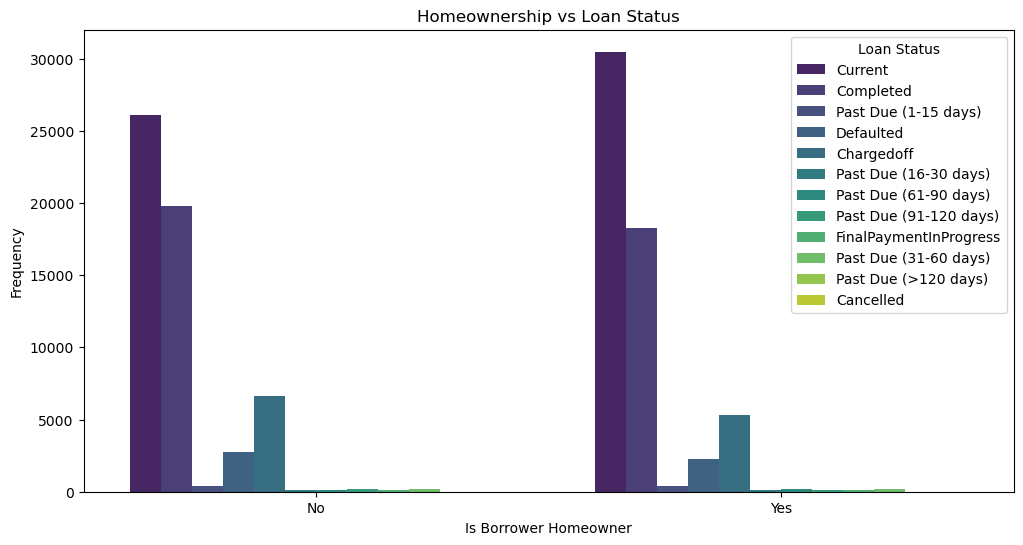

In [60]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Is_Borrower_Homeowner', hue='Loan_Status', palette='viridis')
plt.title('Homeownership vs Loan Status')
plt.xlabel('Is Borrower Homeowner')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Loan Status')
plt.show()

### Observation 
- Borrowers who are homeowners tend to have a higher proportion of completed loans compared to non-homeowners,

### Credit Score vs. Loan Amount

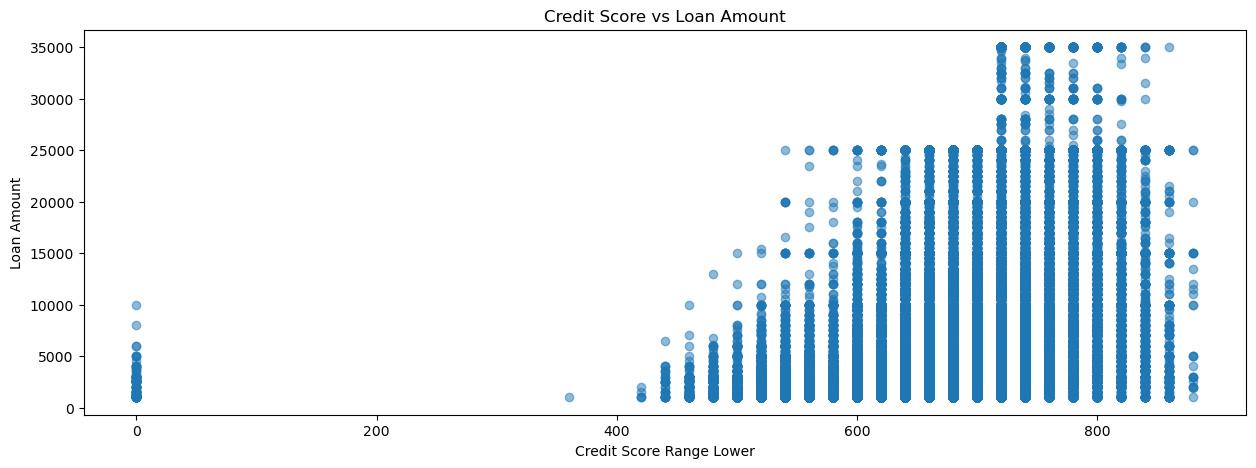

In [61]:
plt.figure(figsize=(15, 5))
plt.scatter(df['Credit_Score_Range_Lower'], df['Loan_Original_Amount'], alpha=0.5)
plt.title('Credit Score vs Loan Amount')
plt.xlabel('Credit Score Range Lower')
plt.ylabel('Loan Amount')
plt.show()

### Observation
- The data indicates that loan defaults are more common among both small and large loan amounts, while loans in the average range tend to have a higher completion rate.

### Employment Status vs. Borrower APR

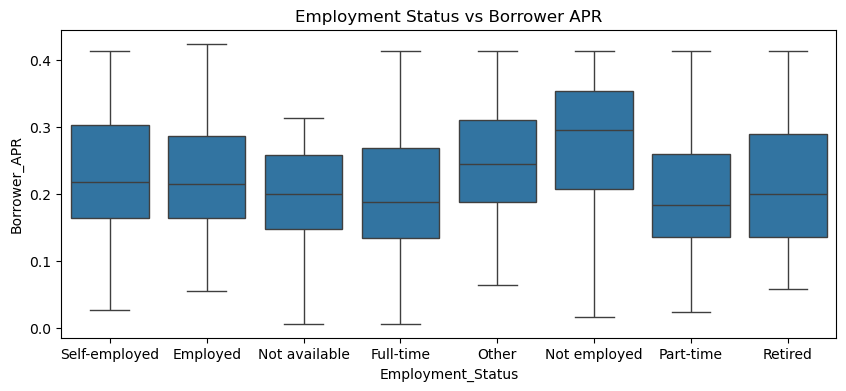

In [62]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='Employment_Status', y='Borrower_APR', data=df)
plt.title('Employment Status vs Borrower APR')
plt.show()

### Obervation
- Borrowers with the Not Employed status have a significantly higher Borrower APR compared to other employment statuses. This suggests that lenders perceive unemployed borrowers as higher risk, resulting in higher interest rates for their loans.

### Loan Status vs. Income Range

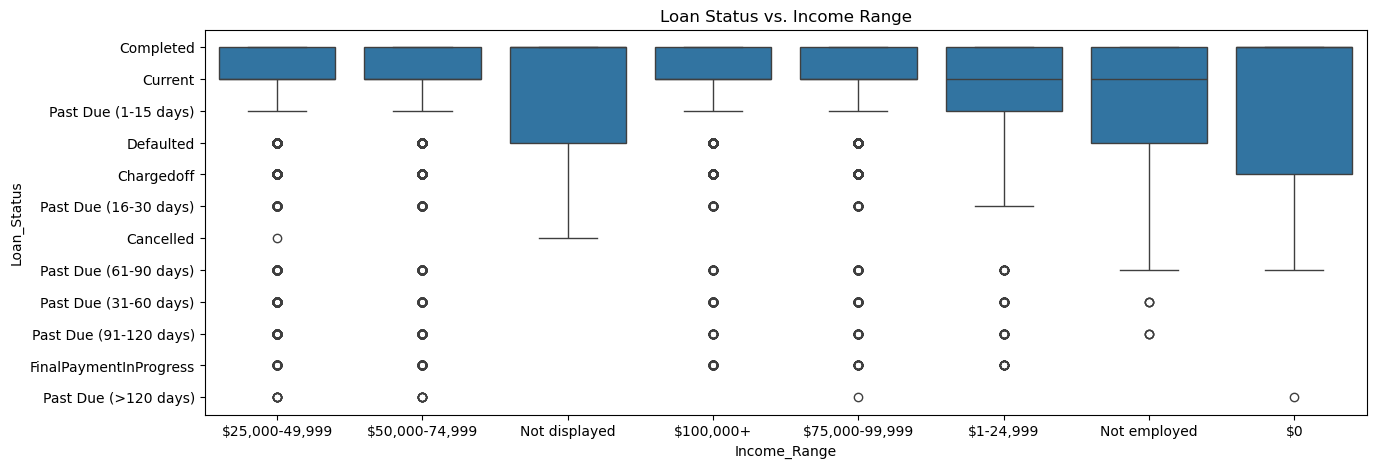

In [39]:
plt.figure(figsize=(15, 5))
sns.boxplot(y='Loan_Status', x='Income_Range', data=df)
plt.title('Loan Status vs. Income Range')
plt.show()

### Observation 
- Loans from lower income ranges tend to have more defaults, while loans in the average income range tend to complete their loans more frequently.

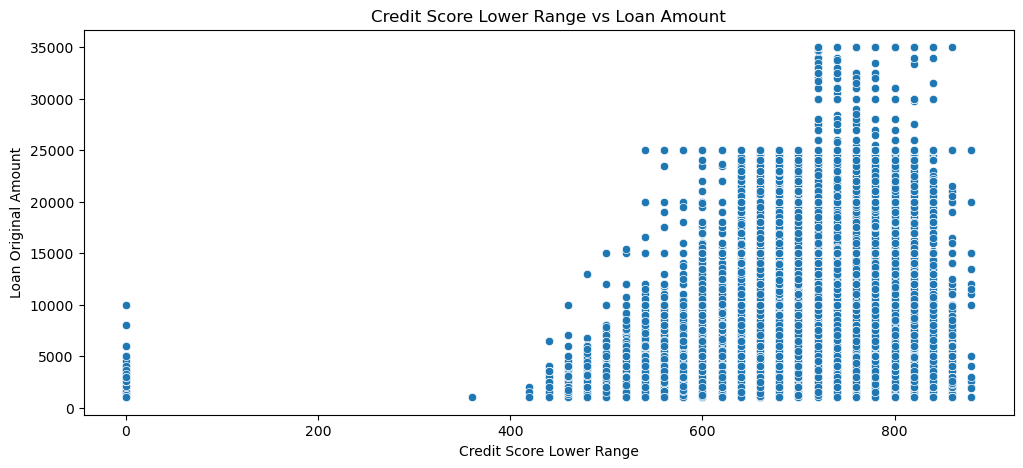

In [63]:
plt.figure(figsize=(12, 5))  
sns.scatterplot(data=df, x='Credit_Score_Range_Lower', y='Loan_Original_Amount')
plt.title('Credit Score Lower Range vs Loan Amount')
plt.xlabel('Credit Score Lower Range')
plt.ylabel('Loan Original Amount')
plt.show()

### Obervation
- This shows the relationship between the Credit Score Lower Range and loan amounts, which showed borrowers with higher Credit scores tend to request larger loans.

### Relationships Observed in the Investigation
During the investigation of the relationships between different features in the dataset, several key observations stood out:

- Income Range vs Loan Original Amount:
There is a clear pattern where borrowers with higher income ranges tend to request larger loan amounts. For instance, borrowers in the 100,000+ income range have the highest loan amounts on average. This suggests that those with higher earnings are more likely to apply for and be approved for larger loans.
On the other hand, borrowers in the lower-income categories, such as 1 - $24,999 tend to request smaller loan amounts. This is expected as individuals with lower income levels may have fewer financial resources and may only be eligible for smaller loans.

- Credit Score vs Loan Amount:
There seems to be a correlation between a borrower’s credit score and the loan amount. As Credit Score Lower Range increases, the Loan Original Amount also appears to increase. Borrowers with higher credit scores tend to apply for larger loans, possibly because they are viewed as lower risk borrowers and are therefore eligible for larger loans at better interest rates.
This relationship suggests that individuals with higher creditworthiness are more confident in taking out higher loan amounts.

- Loan Status vs Income Range:
Loan Status (whether a loan is paid or in default) varies across income ranges. Borrowers with higher incomes are generally less likely to default on loans, as they have more financial stability. In contrast, borrowers with lower incomes like 1-$24,999 seem to have higher rates of default. This might indicate that lower income borrowers face more financial challenges, making it harder for them to meet repayment terms.


Additionally, borrowers in the Unknown income category (which includes "Not displayed" and "Not employed" groups) could be a mix of individuals who are difficult to assess due to lack of proper income data, which could explain some inconsistencies in loan statuses.

### Interesting Relationships Between Other Features
While the primary focus was on the relationships between Loan_Original_Amount, Income_Range, and Loan_Status, there were several interesting relationships observed between other features in the dataset as well:

- Employment Status vs Loan Amount:
There is an observable relationship between Employment Status and the Loan Amount. Borrowers who are employed tend to request higher loan amounts compared to those who are unemployed or have unknown employment status. This is expected since employed individuals have a more stable source of income, which likely makes them eligible for larger loans.
However, there were a few cases where unemployed or unknown borrowers requested higher loan amounts. These could represent exceptional cases such as loans secured by other assets or loans approved based on other factors..

- Debt-to-Income Ratio vs Loan Amount:
The Debt-to-Income Ratio is another interesting feature. Borrowers with higher ratios tend to request smaller loan amounts. This makes sense as individuals with high existing debt may struggle to take on additional loans or may not qualify for larger amounts.
On the other hand, individuals with low ratios, indicating they have a better balance between their income and debt, are more likely to apply for larger loan amounts.

- Homeownership Status vs Loan Amount:
Another interesting relationship is between Homeownership Status and Loan Amount. Homeowners tend to request slightly higher loan amounts compared to renters. This might be because homeowners are seen as more financially stable, and they might use their property as collateral for larger loans.
However, there are still many renters who apply for significant loan amounts, possibly due to other assets or creditworthiness factors that allow them to qualify.


- Credit Score vs Loan Status:
There is a noticeable connection between Credit Score and Loan Status. Borrowers with higher credit scores generally have better loan statuses and they are less likely to default. This suggests that individuals with good credit are more likely to be approved for loans and are better at managing their repayments. While, those with lower credit scores tend to default more frequently, which aligns with expectations around creditworthiness and loan risk.

Loan Amount vs Loan Term:
The relationship between Loan Amount and Loan Term is also worth noting. Borrowers who request higher loan amounts tend to choose longer loan terms. This might be because they need more time to repay the larger loan, which makes sense from a financial planning perspective. Shorter loan terms are typically chosen for smaller loans, likely because they are more manageable and borrowers want to pay them off more quickly.

# Conclusion
### Main Findings

- Income and Loan Amount: There is a clear correlation between income and loan amount, with higher income borrowers generally requesting larger loans. Middle income groups, such as 25,000 to $74,999, make up the majority of borrowers.

- Credit Scores Impact on Loans: Borrowers with higher credit scores tend to request and receive larger loan amounts. This is expected as better credit scores signal financial reliability to lenders.

- Homeownership Influence: Homeowners tend to borrow larger amounts compared to renters. This likely reflects the stability associated with homeownership, making these borrowers appear less risky to lenders.

- Borrower APR: Higher APRs were typically associated with borrowers in lower income brackets or those with lower credit scores. This suggests that APRs reflect the perceived risk of the borrower.

- Employment Status: Employed borrowers generally request higher loan amounts compared to those who are unemployed. This shows that employment status plays a role in determining loan amounts, with employed borrowers perceived as more financially stable.

- Debt-to-Income Ratio: Borrowers with higher debt-to-income ratios tend to request smaller loans, indicating that they are carrying a higher amount of debt relative to their income, making them less likely to take on large loans.

- Loan Terms: Borrowers requesting larger loan amounts often choose longer loan terms. This allows them to spread the repayment over time, making it more manageable.

- Loan Status: Borrowers in lower income brackets and with lower credit scores showed a higher likelihood of defaulting on their loans, which is consistent with common lending practices where higher risk borrowers are more likely to default.

- Income Range and Credit Score:
Higher income ranges often correspond with higher credit scores, enabling these borrowers to access larger loans with better terms.







## Steps Taken During Data Exploration


- Data Cleaning: We addressed missing values and renamed unclear columns and standardize it for clarity and consistency.

- Univariate Analysis: We explored individual variables such as income and loan amounts through histograms and boxplots, which revealed trends.

- Bivariate Analysis: We analyzed relationships, like loan amounts vs. income ranges, using visualizations to understand how these variables interact.

- Identifying Key Patterns: We found that higher incomes and better credit scores generally lead to larger loans, shedding light on loan approval factors.

- Visualization: We used visualizations to reveal key relationships in the data, making complex patterns easier to understand.

- We summarized key insights, such as the impact of income and credit scores on loan amounts, providing a clear view of the data's behavior.